# **📊 Exploratory Data Analysis For E-commerce Dataset**

The goal from this project is to learn and master the exploratory data analysis and the use of some statistic tools.
- **The goals of the project:**

  * Explore and understand the dataset.
  * visualize the distributions of the variables.
  * Find the relationships between the variables and visualize them.
  * Identify trends and patterns in the data.
  * Analyze transactions and customer behavior.

- **Dataset:** This project uses the [E-commerce Dataset](https://www.kaggle.com/datasets/steve1215rogg/e-commerce-dataset/data) from Kaggle, which contains information on e-commerce transactions and sales from 2024.

### **Table of Contents**

- Importing Libraries
- Loading the Dataset

- **Phase 1: Data Understanding & Quality Assessment**
    - Initial Data Exploration
    - Data Quality Checks
- **Phase 2: Univariate Analysis**
    - Categorical Variables Analysis
    - Numerical Variables Analysis
- **Phase 3: Bivariate & Multivariate Analysis**
    - Numerical Relationships
    - Categorical-Numerical Relationships
- **Phase 4: Customer Behavior Analysis**
- **Phase 5: Transaction Analysis**
- **Phase 6: Conclusion & Recommendations**

 

In [2]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy.stats as stats
from scipy.stats import gaussian_kde
from scipy.stats import f_oneway, chi2_contingency
import calendar

### **Phase 1: Data Understanding & Quality Assessment**

In [3]:
#Import the data 
df = pd.read_csv("ecommerce_dataset_updated.csv")

#### 1.1 Initial Data Exploration

Display the first 5 rows of the dataset to get an initial understanding of its structure and content.

In [4]:
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


Display the last 5 rows of the dataset to see how it ends.

In [5]:
df.tail()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024
3659,e73ad07c,a5d07442-d,Home & Kitchen,235.77,30,165.04,UPI,14-04-2024


Getting some information about the dataset using the `info()` method. This includes the number of non-null entries, data types of each column, and memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


Using the `describe()` method to get summary statistics for numerical columns in the dataset, such as count, mean, standard deviation, minimum, maximum, and quartiles.

In [7]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [8]:
#check the shape of the data set.
print("Data Shape:")
print("Columns:",df.shape[0])
print("Rows:",df.shape[1])

Data Shape:
Columns: 3660
Rows: 8


#### 1.2 Data Quality Checks

- **Missing Values Analysis:**

In [9]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)
total_missing_count = df.isnull().sum().sum()
print("Total missing values: ",total_missing_count)

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64
Total missing values:  0


No missing values where found.

- **Duplicate Detection:**

In [ ]:
def comprehensive_duplicate_check(df):
    """
    duplicate analysis
    """
    print("=== DUPLICATE ANALYSIS ===\n")
    
    # 1. Exact duplicates
    exact_dups = df.duplicated().sum()
    print(f"1. Row duplicates: {exact_dups}")
    
    # 2. Business logic duplicates
    business_dups = df.duplicated(subset=['User_ID', 'Product_ID', 'Purchase_Date']).sum()
    print(f"2. Same user-product-date combinations: {business_dups}")
    
    # 3. Transaction ID duplicates (if this represents unique transactions)
    if len(df) != len(df.drop_duplicates()):
        print("3. Data integrity issue detected!")
    
    # 4. Suspicious patterns
    user_product_counts = df.groupby(['User_ID', 'Product_ID']).size()
    repeat_purchases = user_product_counts[user_product_counts > 1]
    print(f"4. Users who bought same product multiple times: {len(repeat_purchases)}")
    
    # 5. Same user, same amount, same date (different products)
    amount_date_dups = df.duplicated(subset=['User_ID', 'Final_Price(Rs.)', 'Purchase_Date']).sum()
    print(f"5. Same user-amount-date (suspicious): {amount_date_dups}")
    
    return {
        'exact_duplicates': exact_dups,
        'business_duplicates': business_dups,
        'repeat_purchases': len(repeat_purchases)
    }

# Use the function
duplicate_analysis = comprehensive_duplicate_check(df)

=== DUPLICATE ANALYSIS ===

1. Row duplicates: 0
2. Same user-product-date combinations: 0
4. Users who bought same product multiple times: 0
5. Same user-amount-date (suspicious): 0


No duplicates where found.

- **Data Consistency Validation:**

Verifying: `Final_Price = Price - (Price × Discount%)`

In [11]:
# Define a small tolerance value
tolerance = 0.001
calculated_final_price = df['Price (Rs.)'] - (df['Price (Rs.)'] * df['Discount (%)'] / 100)
# Find mismatches with tolerance
mismatched_rows = df[~np.isclose(calculated_final_price, df['Final_Price(Rs.)'], rtol=tolerance, atol=tolerance)]
# Print the mismatched rows
print(f"Rows with inconsistent Final_Price(Rs.) (tolerance: ±{tolerance*100}%):")
print(mismatched_rows)

if mismatched_rows.empty:
    print("Final Price calculation is consistent with the data.")
else:
    print("Final Price calculation is inconsistent with the data.")

Rows with inconsistent Final_Price(Rs.) (tolerance: ±0.1%):
Empty DataFrame
Columns: [User_ID, Product_ID, Category, Price (Rs.), Discount (%), Final_Price(Rs.), Payment_Method, Purchase_Date]
Index: []
Final Price calculation is consistent with the data.


Check for negative prices or impossible discount percentages (>100%)

In [12]:
#Check if discount value in in range between 0 - 100.
if (df["Discount (%)"] > 100).any() or (df["Discount (%)"] < 0).any():
    print("Error: Discount (%) contains values out of valid range (0–100).")
else: 
    print("Values are in range(0-100)")


Values are in range(0-100)


Converting "Purchase_Date" format to a proper date format 

In [13]:
# convert 'Purchase_Date' to datetime format
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y')
# Extracting date components
df['Day'] = df['Purchase_Date'].dt.day
df['Month'] = df['Purchase_Date'].dt.month
#df['Year'] = df['Purchase_Date'].dt.year               #we don't need the year since all data is from 2024.

#Ill go back to this if I need to analyze the weekday or week number.
df['Weekday'] = df['Purchase_Date'].dt.day_name()  
df['Week_Number'] = df['Purchase_Date'].dt.isocalendar().week

### **Phase 2: Univariate Analysis**

#### 2.1 Categorical Variables

So we have two categorical variables "Category & Payment_Method" .
we will analyze the distribution of these variables.

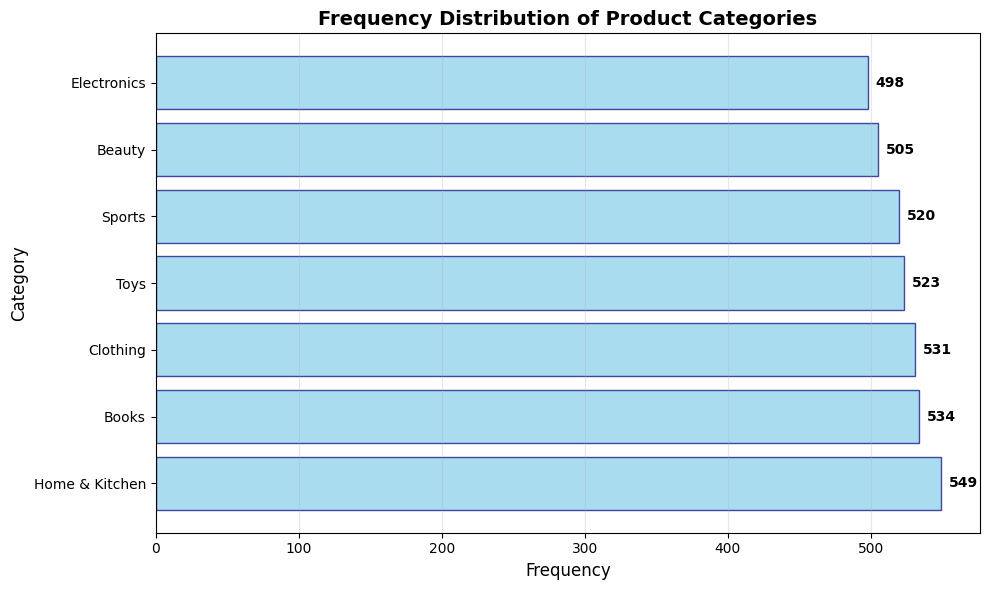

Total Categories: 7
Most popular: Home & Kitchen (549 purchases)
Least popular: Electronics (498 purchases)
Average purchases per category: 522.9

Distribution Analysis:
Range: 51 purchases
Coefficient of Variation: 3.3%


In [14]:
# Plotting the frequency distribution of product categories
category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))  # Add figure size for better readability
plt.barh(category_counts.index, category_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)

# Add value labels on bars
for i, v in enumerate(category_counts.values):
    plt.text(v + max(category_counts.values)*0.01, i, str(v), 
             va='center', ha='left', fontweight='bold')

plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Frequency Distribution of Product Categories', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)  # Add subtle grid
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total Categories: {len(category_counts)}")
print(f"Most popular: {category_counts.index[0]} ({category_counts.iloc[0]} purchases)")
print(f"Least popular: {category_counts.index[-1]} ({category_counts.iloc[-1]} purchases)")
print(f"Average purchases per category: {category_counts.mean():.1f}")
# Calculate percentages and business insights
category_percentages = (category_counts / len(df) * 100).round(2)
# Check if distribution is uniform
print(f"\nDistribution Analysis:")
print(f"Range: {category_counts.max() - category_counts.min()} purchases")
print(f"Coefficient of Variation: {(category_counts.std()/category_counts.mean()*100):.1f}%")


By analyzing this bar plot, we can see that the most popular category is `Home & Kitchen`, followed by `Books`and `Clothing`. the least popular category is `Electronics`.

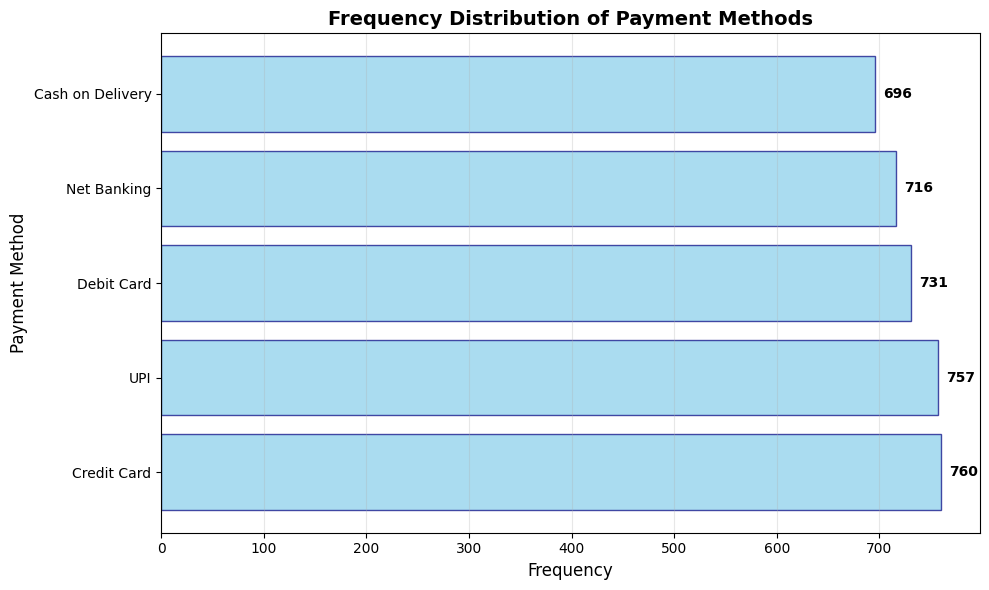

Total Payment Methods: 5
Most popular: Credit Card (760 transactions)
Least popular: Cash on Delivery (696 transactions)
Average transactions per payment method: 732.0

Distribution Analysis:
Range: 64 transactions
Coefficient of Variation: 3.7%


In [15]:
# Count the frequency of each payment method
payment_method_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(10, 6))
plt.barh(payment_method_counts.index, payment_method_counts.values, color='skyblue', edgecolor='navy', alpha=0.7)
# Add value labels on bars
for i, v in enumerate(payment_method_counts.values):
    plt.text(v + max(payment_method_counts)*0.01, i, str(v), 
             va='center', ha='left', fontweight='bold')

plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
plt.title('Frequency Distribution of Payment Methods', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)  
plt.tight_layout()
plt.show()
# Print summary statistics
print(f"Total Payment Methods: {len(payment_method_counts)}")
print(f"Most popular: {payment_method_counts.index[0]} ({payment_method_counts.iloc[0]} transactions)")
print(f"Least popular: {payment_method_counts.index[-1]} ({payment_method_counts.iloc[-1]} transactions)")
print(f"Average transactions per payment method: {payment_method_counts.mean():.1f}")
# check if distribution is uniform
print(f"\nDistribution Analysis:")
print(f"Range: {payment_method_counts.max() - payment_method_counts.min()} transactions")
print(f"Coefficient of Variation: {(payment_method_counts.std()/payment_method_counts.mean()*100):.1f}%")

**Overall Insights:** 

1. Categories: 7 types, CV = 3.3% (very uniform).
2. Payment Methods: 5 types, CV = 3.7% (very uniform).
3. Mature, well-balanced marketplace.
4. No dominant categories or payment methods bias.
5. Customers have diverse preferences & flexibility.
6. Business serves broad market segments equally
7. results indicate a healthy, competitive marketplace.

#### 2.2 Numerical Variables


we have 3 numerical variables "Price, Discount & Final_Price" . so we will analyze the distribution of these variables.

In [16]:
numerical_cols = ["Price (Rs.)", "Discount (%)", "Final_Price(Rs.)"]
desc_stats = df[numerical_cols].describe()
desc_stats.loc['median'] = df[numerical_cols].median()
print("Descriptive Statistics:")
print("-" * 50)
print(desc_stats)


Descriptive Statistics:
--------------------------------------------------
        Price (Rs.)  Discount (%)  Final_Price(Rs.)
count   3660.000000   3660.000000       3660.000000
mean     254.800675     18.825137        206.906579
std      141.682621     14.731338        122.687844
min       10.090000      0.000000          5.890000
25%      134.012500      5.000000        104.512500
50%      253.845000     15.000000        199.185000
75%      377.595000     25.000000        304.117500
max      499.960000     50.000000        496.820000
median   253.845000     15.000000        199.185000


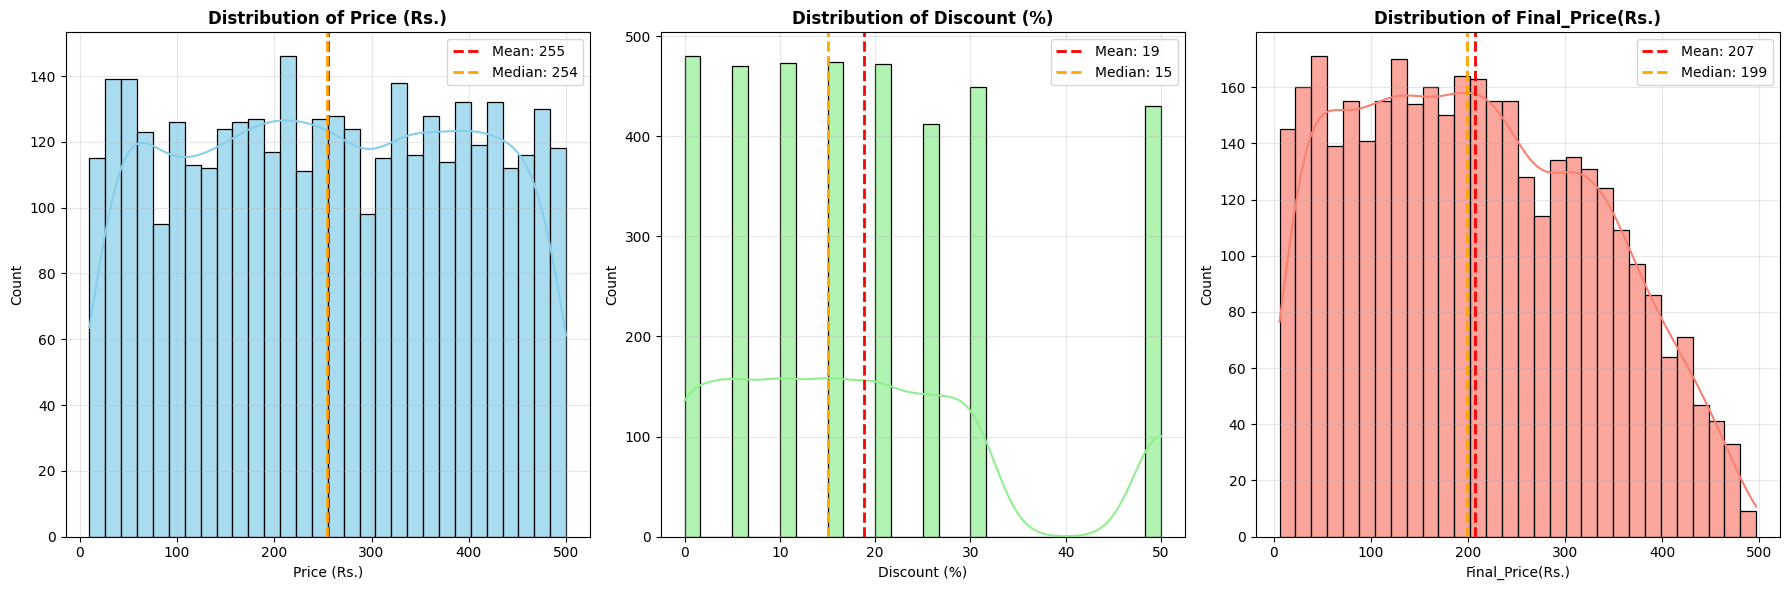

In [17]:
# Analyze all numerical variables at once
numerical_cols = ['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(numerical_cols):
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, bins=30, 
                 color=['skyblue', 'lightgreen', 'salmon'][i], 
                 alpha=0.7, ax=axes[i])
    
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # Add statistics on plot
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.0f}')
    axes[i].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.0f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

#### DISTRIBUTION INSIGHTS 
- PRICING STRATEGY:
1. Uniform price distribution suggests diverse product range
2.  No price concentration indicates broad market coverage
- DISCOUNT STRATEGY:
1. uniform discount distribution indicates consistent discounting policy
2. Very consistent across all products
3. Customers can tend to not prefer any specific discount in this data set.
- CUSTOMER BEHAVIOR:
1. Final price distribution shows preference for lower-priced items
2. Right skew indicates price-sensitive customer base
3. Final prices cluster around lower end, with fewer high-priced items

So What This Tells Us:

- Uniform pricing across moderate range (50-500 Rs)
- Variable discounting strategy (5-50% range, not consistent)
- Customers prefer lower-priced items after discounts are applied
- Business Model:Moderate price range + variable discounts = flexible, middle-market pricing

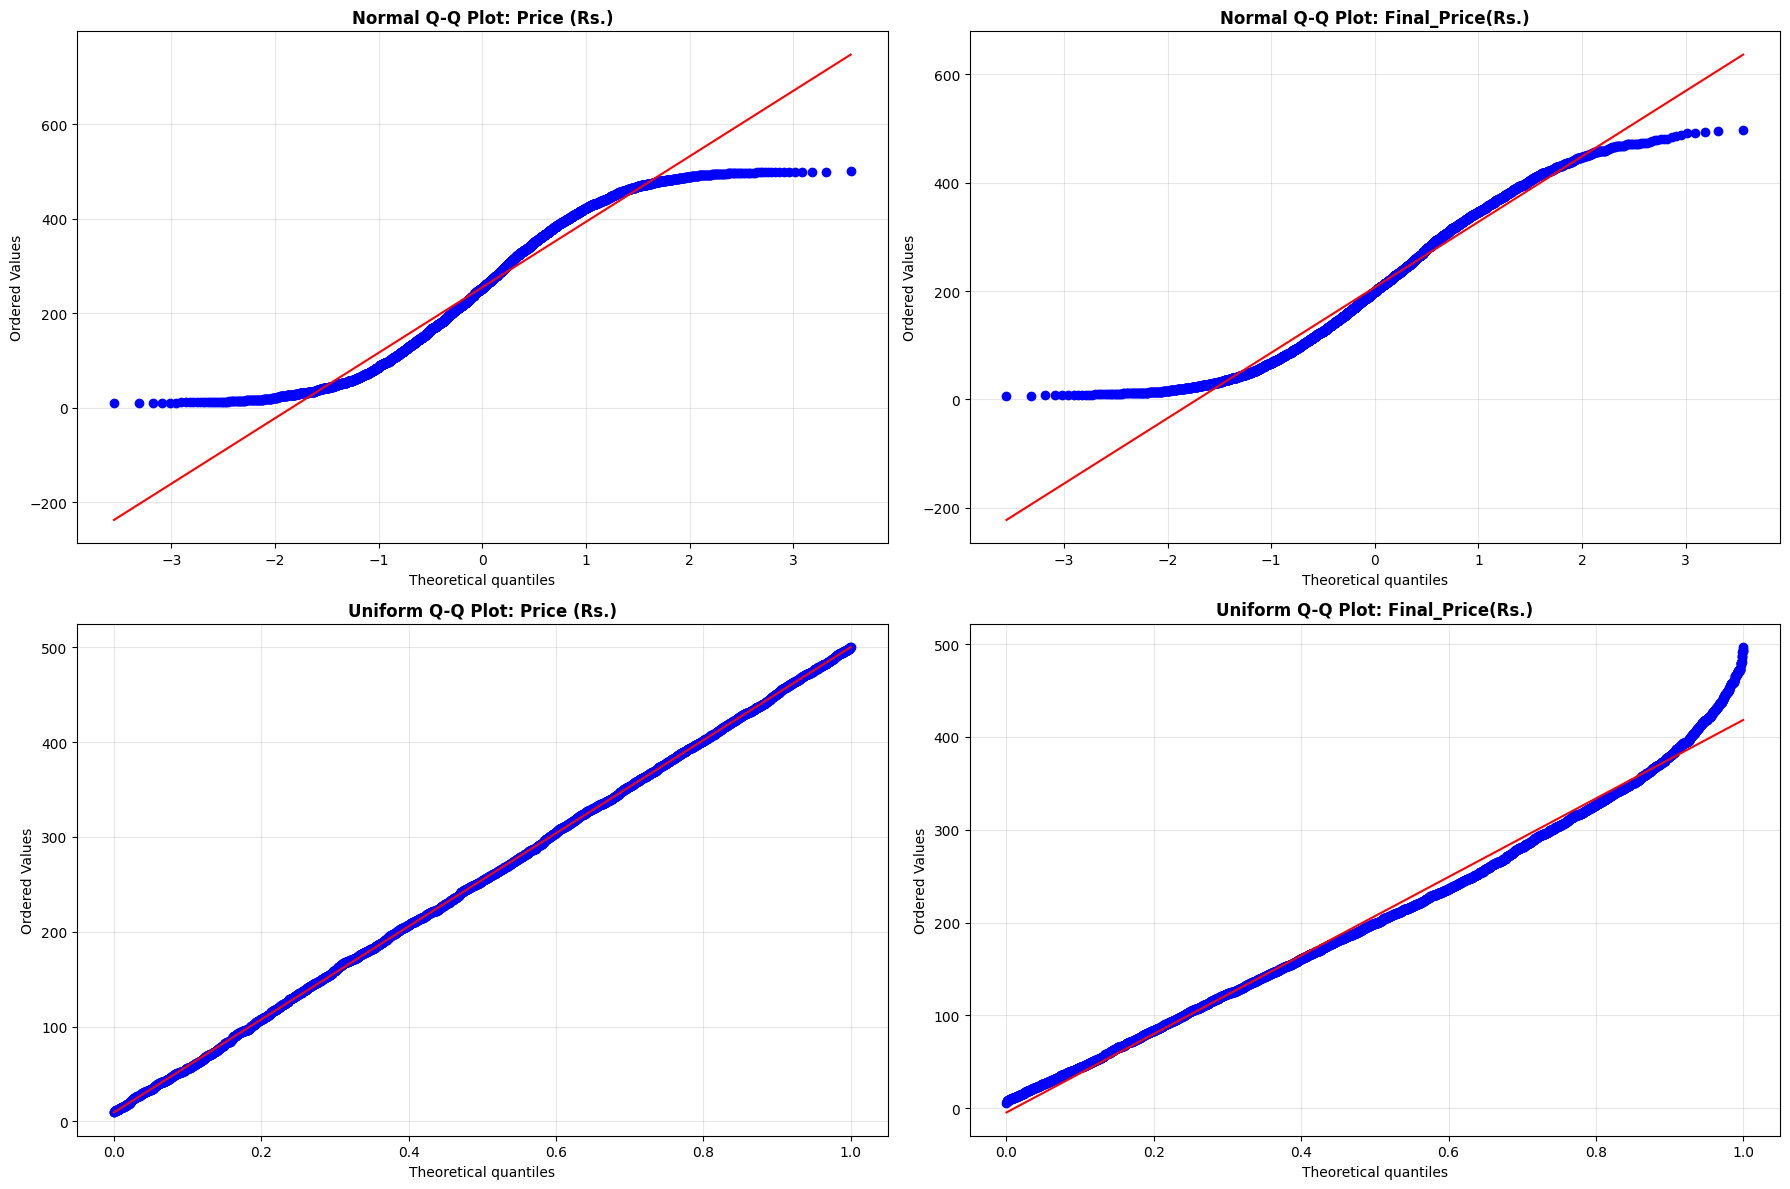

In [18]:
# Create subplots for Q-Q plots (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
numerical_cols = ['Price (Rs.)', 'Final_Price(Rs.)']

# Normal Q-Q plots (top row)
for i, col in enumerate(numerical_cols):
    stats.probplot(df[col], dist="norm", plot=axes[0,i])
    axes[0,i].set_title(f'Normal Q-Q Plot: {col}', fontsize=12, fontweight='bold')
    axes[0,i].grid(True, alpha=0.3)

# Uniform Q-Q plots (bottom row)
for i, col in enumerate(numerical_cols):
    stats.probplot(df[col], dist="uniform", plot=axes[1,i])
    axes[1,i].set_title(f'Uniform Q-Q Plot: {col}', fontsize=12, fontweight='bold')
    axes[1,i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


We confirm with Q–Q plots that the distributions are not normal. We also check for uniformity, which shows that the distributions fit a uniform distribution well.

Also, we don't need to do **outlier analysis** because the distributions are not normal distributions, and we have no extreme values that would significantly skew the analysis.

### **Phase 3: Bivariate & Multivariate Analysis**

#### 3.1 Numerical Relationships

we will use correlation matirix heatmap to visualize the relationships between numerical variables.

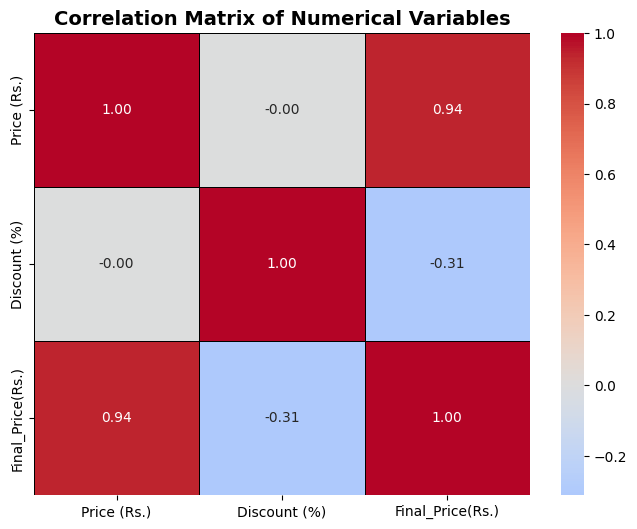

=== CORRELATION INSIGHTS ===
Price (Rs.) vs Discount (%): -0.003
Price (Rs.) vs Final_Price(Rs.): 0.936
Discount (%) vs Final_Price(Rs.): -0.312


In [19]:
# Your code + interpretation
select_columns1 = ['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']
correlation_matrix = df[select_columns1].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, linecolor='black', center=0)
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
plt.show()

# Print strongest correlations
print("=== CORRELATION INSIGHTS ===")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")

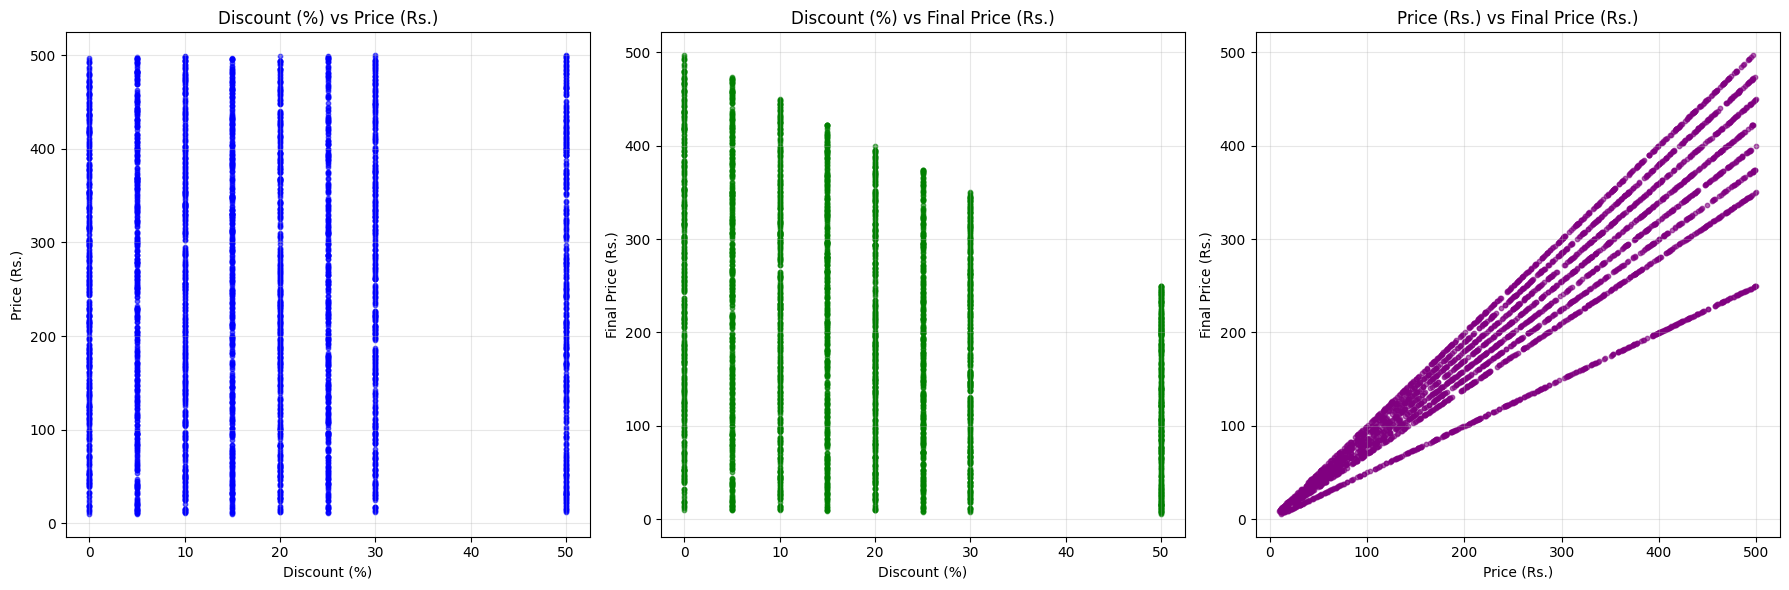

In [20]:
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create scatter plots with smaller dots and higher opacity
axes[0].scatter(df['Discount (%)'], df['Price (Rs.)'], color='blue', alpha=0.6, s=10)
axes[0].set_xlabel('Discount (%)')
axes[0].set_ylabel('Price (Rs.)')
axes[0].set_title('Discount (%) vs Price (Rs.)')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(df['Discount (%)'], df['Final_Price(Rs.)'], color='green', alpha=0.6, s=10)
axes[1].set_xlabel('Discount (%)')
axes[1].set_ylabel('Final Price (Rs.)')
axes[1].set_title('Discount (%) vs Final Price (Rs.)')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(df['Price (Rs.)'], df['Final_Price(Rs.)'], color='purple', alpha=0.6, s=10)
axes[2].set_xlabel('Price (Rs.)')
axes[2].set_ylabel('Final Price (Rs.)')
axes[2].set_title('Price (Rs.) vs Final Price (Rs.)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- **Discount vs Price (Left)**
1. Vertical stripes pattern = No correlation (r ≈ 0)
2. Confirms uniform discount policy across all price ranges
3. Shows discounts are NOT price-dependent
- **Discount vs Final_Price (Middle)**
1. Clear negative trend = Higher discounts → Lower final prices (r = -0.31)
2. Diagonal striping pattern shows the relationship
- **Price vs Final_Price (Right)**
1. Perfect linear relationship (r = 0.94)
2. Shows the discount formula : Final_Price = Price × (1 - Discount%)
3. Tight clustering around the line = Consistent pricing logic

#### 3.2 Categorical-Numerical Relationships

 **Category Analysis:**

In [21]:
print("CATEGORICAL-NUMERICAL RELATIONSHIPS - STATISTICAL TESTS")
print("="*60)
df['Price_Range'] = pd.cut(df['Final_Price(Rs.)'], bins=3, labels=['Low', 'Medium', 'High'])
# 1. ANOVA TESTS
print("\n1. ANOVA TESTS:")
print("-"*20)

def run_anova(target, group_col):
    groups = [df[df[group_col] == cat][target] for cat in df[group_col].unique()]
    f_stat, p = f_oneway(*groups)
    print(f"{target} by {group_col}:")
    print(f"  F-statistic: {f_stat:.4f}, p-value: {p:.6f}")
    print(f"  Result: {'Significant' if p < 0.05 else 'Not significant'} difference\n")

run_anova('Final_Price(Rs.)', 'Category')
run_anova('Discount (%)', 'Category')

# 2. CHI-SQUARE TESTS
print("2. CHI-SQUARE TESTS:")
print("-"*25)

def run_chi2(col1, col2, label):
    table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, _ = chi2_contingency(table)
    print(f"{label}:")
    print(f"  Chi-square: {chi2:.4f}, p-value: {p:.6f}, df: {dof}")
    print(f"  Result: {'Significant' if p < 0.05 else 'Not significant'} association\n")

run_chi2('Price_Range', 'Category', 'Price Range vs Category')
run_chi2('Payment_Method', 'Month', 'Payment Method vs Month')



CATEGORICAL-NUMERICAL RELATIONSHIPS - STATISTICAL TESTS

1. ANOVA TESTS:
--------------------
Final_Price(Rs.) by Category:
  F-statistic: 1.0284, p-value: 0.404603
  Result: Not significant difference

Discount (%) by Category:
  F-statistic: 1.0307, p-value: 0.403101
  Result: Not significant difference

2. CHI-SQUARE TESTS:
-------------------------
Price Range vs Category:
  Chi-square: 14.9578, p-value: 0.243751, df: 12
  Result: Not significant association

Payment Method vs Month:
  Chi-square: 44.5977, p-value: 0.284506, df: 40
  Result: Not significant association



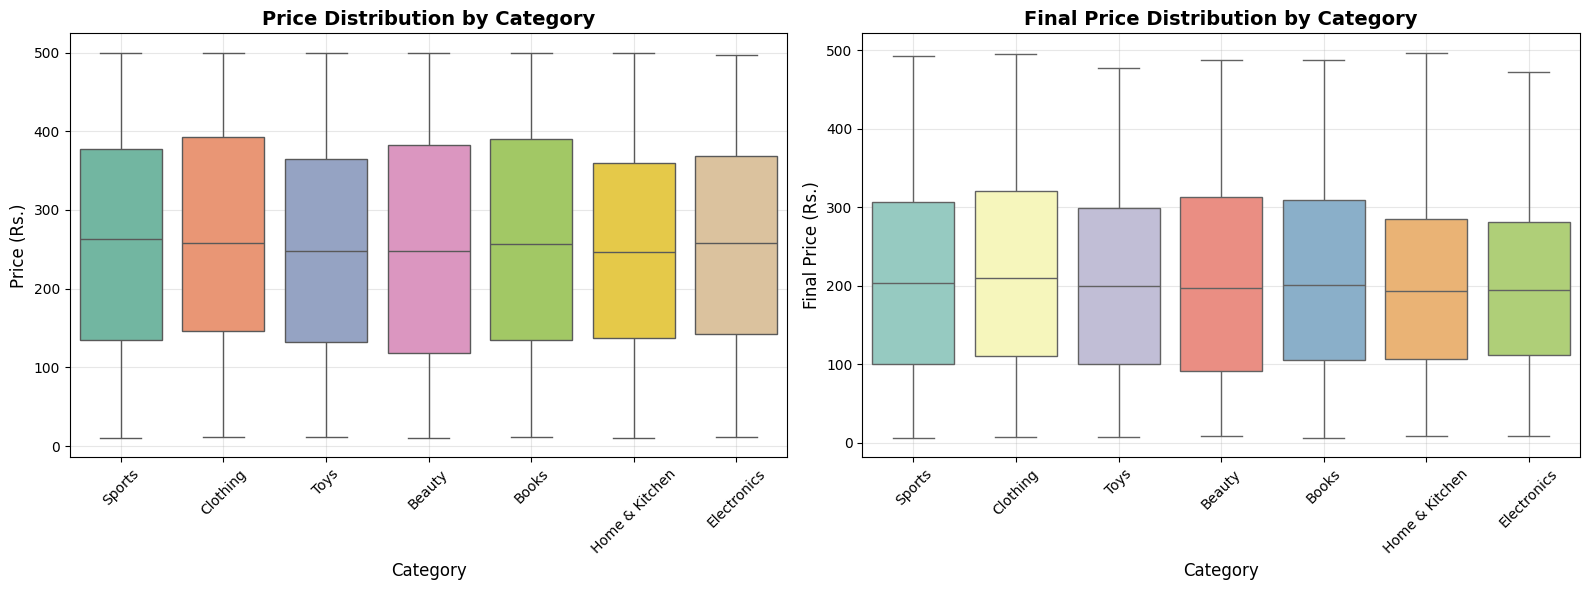

=== PRICE ANALYSIS BY CATEGORY ===

PRICE STATISTICS:
                median    mean
Category                      
Sports          262.73  258.62
Clothing        258.60  263.12
Electronics     258.16  251.65
Books           256.74  259.12
Toys            248.35  248.96
Beauty          247.91  252.74
Home & Kitchen  246.18  249.26

FINAL PRICE STATISTICS:
                median    mean
Category                      
Clothing        209.52  217.17
Sports          203.76  208.69
Books           200.90  208.14
Toys            199.47  205.14
Beauty          196.95  206.37
Electronics     193.92  201.73
Home & Kitchen  193.80  200.96


In [22]:
# boxplots for categorical-numerical relationships
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Price by Category
sns.boxplot(data=df, x='Category', y='Price (Rs.)', hue='Category', 
            ax=axes[0], palette='Set2', legend=False)
axes[0].set_title('Price Distribution by Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category', fontsize=12)
axes[0].set_ylabel('Price (Rs.)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Final_Price by Category 
sns.boxplot(data=df, x='Category', y='Final_Price(Rs.)', hue='Category', 
            ax=axes[1], palette='Set3', legend=False)
axes[1].set_title('Final Price Distribution by Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Final Price (Rs.)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("=== PRICE ANALYSIS BY CATEGORY ===")
price_stats = df.groupby('Category')['Price (Rs.)'].agg(['median','mean']).round(2)
final_stats = df.groupby('Category')['Final_Price(Rs.)'].agg(['median','mean']).round(2)
    
print("\nPRICE STATISTICS:")
print(price_stats.sort_values('median', ascending=False))
    
print("\nFINAL PRICE STATISTICS:")
print(final_stats.sort_values('median', ascending=False))

#### CATEGORY PRICING INSIGHTS
1. Roughly uniform pricing across all categories.
2. No premium or budget category positioning.
3. Consistent discount application.
4. Balanced product strategy.
##### Business Model:
1. Middle-market positioning across all categories.
2. No category-based price discrimination.
4. Standardized pricing approach.

- This box plot perfectly aline with with earlier findings 
1. Uniform categorical distribution.
2. Uniform pricing within categories (no price clustering).


In [23]:
# Average discount by category 
avg_discount = df.groupby('Category')['Discount (%)'].agg(['mean']).round(2)
# Print numerical results
print("\nAverage Discount by Category (%)\n")
print(avg_discount.sort_values('mean', ascending=False))


Average Discount by Category (%)

                 mean
Category             
Home & Kitchen  19.61
Sports          19.33
Electronics     19.27
Books           19.04
Beauty          18.48
Toys            18.13
Clothing        17.92


We can see that averages of discounts by category are very close to each other with the `Home & Kitchen` category having the highest average discount and we can conclude from this plan that the business follow consist discount policy through all the the categories.

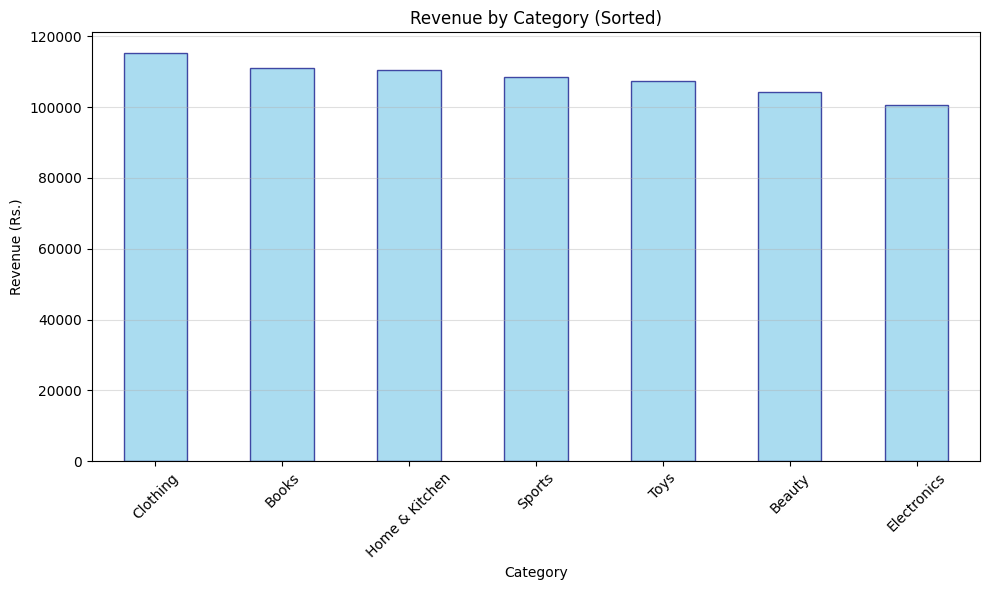

In [24]:
# Groupby category and final_price and calculate the sum of revenue in each category 
revenue_for_categories = df.groupby('Category')['Final_Price(Rs.)'].agg(['sum']).round(2)
revenue_sorted = revenue_for_categories.sort_values('sum', ascending=False)

plt.figure(figsize=(10, 6))
revenue_sorted['sum'].plot(kind='bar', color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Revenue by Category (Sorted)')
plt.xlabel('Category')
plt.ylabel('Revenue (Rs.)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

As we can see the revenue from each of categories is almost uniform with the `clothing` having the highest revenue and `Electronics` with the lowest revenue. and this confirms the earlier findings that the business model is a middle-market positioning across all categories and also almost line up with Frequency Distribution of Product Categories.

##### Payment Method Analysis

In [25]:
# Basic spending analysis by payment method
spending_analysis = df.groupby('Payment_Method').agg({
    'Final_Price(Rs.)': ['sum', 'mean', 'median', 'std']
}).round(2)

spending_analysis.columns = ['Total_Revenue', 'Avg_Spending', 'Median_Spending', 'Std_Dev']
print("=== SPENDING PATTERNS BY PAYMENT METHOD ===")
print(spending_analysis.sort_values('Total_Revenue', ascending=False))

=== SPENDING PATTERNS BY PAYMENT METHOD ===
                  Total_Revenue  Avg_Spending  Median_Spending  Std_Dev
Payment_Method                                                         
Credit Card           156018.02        205.29           194.36   122.04
UPI                   154684.81        204.34           195.46   123.19
Debit Card            153362.26        209.80           208.15   123.36
Net Banking           146804.40        205.03           201.66   120.21
Cash on Delivery      146408.59        210.36           198.30   124.86


From this analysis and without the need of statical testing since the values are almost uniform and we can conclude that all payment methods have similar spending patterns and no premium payment method for high-value transactions

### **Phase 4: Customer Behavior Analysis**

In [26]:
total_unique_users = df['User_ID'].nunique()
print(f"Total unique users: {total_unique_users}")

Total unique users: 3660


Customer-level analysis was not possible due to the absence of unique user identifiers in the dataset. Analysis focused on transaction-level and product-level insights instead.

### **Phase 5: Transaction Analysis**

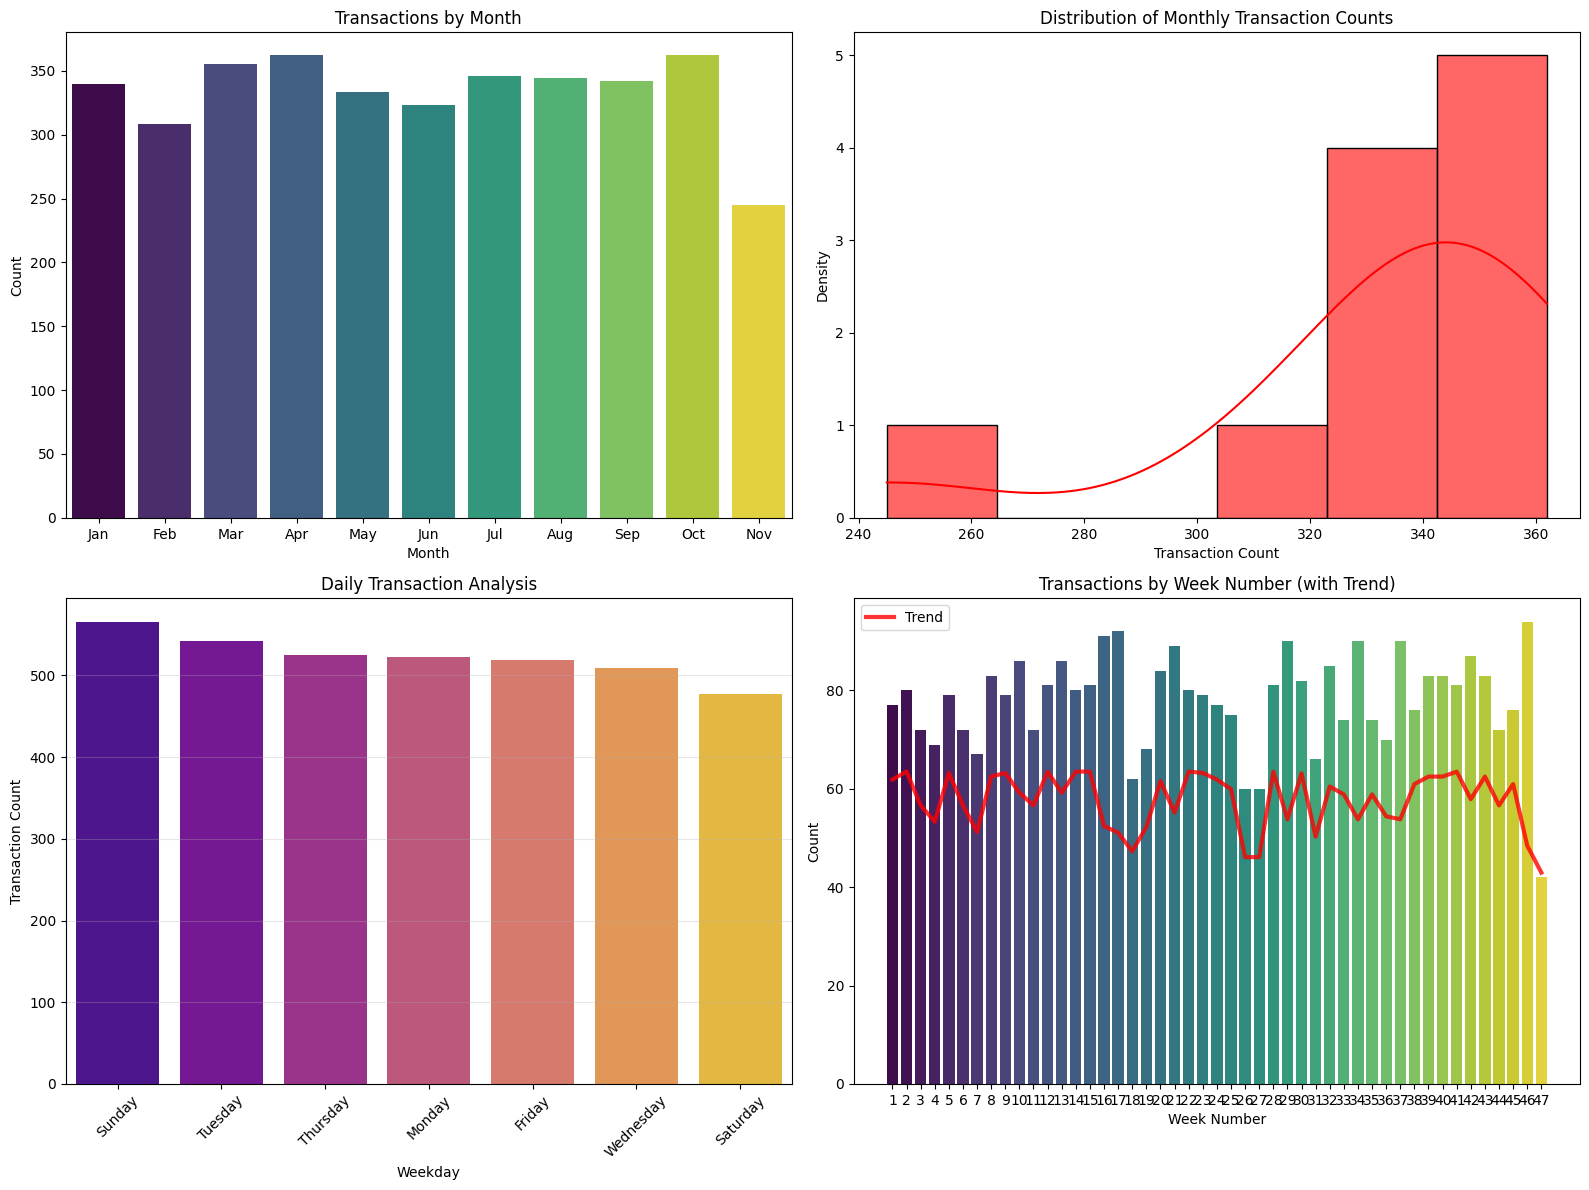


1. Purchase Timing Patterns:
By Month:
Month
1     340
2     308
3     355
4     362
5     333
6     323
7     346
8     344
9     342
10    362
11    245
Name: count, dtype: int64

2. Price Range Groups:
Price_Range
Low       1550
Medium    1429
High       681
Name: count, dtype: int64

3. Weekly Transaction Analysis:
Weekday
Sunday       566
Tuesday      542
Thursday     525
Monday       522
Friday       519
Wednesday    509
Saturday     477
Name: count, dtype: int64


In [27]:
monthly = df['Month'].value_counts().sort_index()
month_labels = [calendar.month_abbr[i] for i in monthly.index]
week_days = df['Weekday'].value_counts().sort_values(ascending=False)
weekly_number = df['Week_Number'].value_counts().sort_index()

# Group by price ranges (for printing only)

price_ranges = df['Price_Range'].value_counts()

# Create 2x2 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Transactions by Month
sns.barplot(x=monthly.index, y=monthly.values, hue=monthly.index, palette='viridis', ax=ax1, legend=False)
ax1.set_title('Transactions by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.set_xticks(range(len(month_labels)))
ax1.set_xticklabels(month_labels)

# Plot 2: Monthly Distribution (Histogram + KDE)
sns.histplot(monthly.values, bins=6, kde=True, ax=ax2, color='red', edgecolor='black', alpha=0.6)
ax2.set_title('Distribution of Monthly Transaction Counts')
ax2.set_xlabel('Transaction Count')
ax2.set_ylabel('Density')

# Plot 3: Daily Transaction Analysis
sns.barplot(x=week_days.index, y=week_days.values, palette='plasma', hue=week_days.index, ax=ax3, legend=False) 

ax3.set_title('Daily Transaction Analysis')
ax3.set_xlabel('Weekday')
ax3.set_ylabel('Transaction Count')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Weekly Number Analysis
sns.barplot(x=weekly_number.index, y=weekly_number.values, palette='viridis', hue=weekly_number.index, ax=ax4, legend=False)
# Add KDE line scaled to fit
kde = gaussian_kde(weekly_number.values)
kde_scaled = kde(weekly_number.values) * (weekly_number.values.max() - weekly_number.values.min()) * 10
ax4.plot(range(len(weekly_number)), kde_scaled + weekly_number.values.min(), 
         color='red', linewidth=3, alpha=0.8, label='Trend')

ax4.set_title('Transactions by Week Number (with Trend)')
ax4.set_xlabel('Week Number')
ax4.set_ylabel('Count')
ax4.legend()

plt.tight_layout()
plt.show()

#
print("\n1. Purchase Timing Patterns:")
print("By Month:")
print(monthly)
print("\n2. Price Range Groups:")
print(price_ranges)
print("\n3. Weekly Transaction Analysis:")
print(week_days)

**Bar Chart – "Transactions by Month"**
- **Seasonal Trends:** 

  - Peaks in October, March and April, indicating high sales during these months.
  - Month (November) has noticeably fewer transactions than other months
  - December missing data, likely due to data collection issues or seasonal factors.
- **Insights:**

  - The drop in transactions in November could go to costumers waiting for the next month (December) for the last year big discounts.

**density plot – "Distribution of Monthly Transactions Count"**
- **Distribution Insights:**

   - The distribution is slight left-skewed, indicating that most months have higher transactions, with a less months having significantly 
   low counts.
   
**Bar Chart – "Daily Transactions Count"**
   - Form this plot we can see that sunday is the most popular day for transactions, followed by Tuesday , with Saturday being the least popular day for transactions. This indicates that customers are more likely to make purchases at the beginning of the week, possibly due to weekend shopping habits or promotional activities.

**Transactions by Week Number (Bottom Right Plot)**

  - Weekly transaction counts are generally consistent, with some noise and minor dips in some weeks that could be tied to holidays or events.
    The absence of a strong upward or downward except last week 47 (november) suggests With reservations stable business operations over the year.


**Price range analysis:**

 - We can see clustering of transactions around the price medium and low price ranges, we can conclude that customers tend to prefer lower-priced items, with fewer transactions at higher price points.



### **Phase 6: Conclusion & Recommendations**

- **Conclusion:**
- No significant dominance by any category or payment method, indicating a diverse customer base and healthy marketplace competition.
- The dataset reflects a well-balanced, middle-market e-commerce business with uniform pricing and discount strategies
- Seasonal peaks in transactions, particularly in October, March, and April.
- Consistent customer behavior with a preference for lower-priced items.
- Variable discounting strategy (5-50% range, not consistent)
- Customers prefer lower-priced items after discounts are applied


- **Business Model:**
  - Middle-market positioning with uniform pricing across categories.
  - Consistent discounting strategy across all products.
  - No premium or budget category positioning.
  - Stable, competitive marketplace with no significant dominance by any category or payment method.

- **Recommendations:**
  - Maintain current pricing and discount strategies to ensure customer satisfaction.
  - Monitor seasonal trends to optimize inventory and marketing efforts.
  - Consider targeted promotions during peak months to maximize sales.
  - Explore opportunities to enhance customer engagement on lower transaction days.

- **Note:** The analysis indicates that the dataset is unlikely to represent real-world data due to its uniformity, and this is confirmed by the dataset description.